In [107]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
symptoms = pd.read_csv('/Users/ashleighmore-hattia/Documents/uel/endo/symptom_dataset_clean.csv')
symptoms.columns 
symptoms.head()

print("Symptoms data set dimensions : {}".format(symptoms.shape))

Symptoms data set dimensions : (789, 13)


In [108]:
symptoms.groupby('endometriosis').size()

endometriosis
1    789
dtype: int64

endometriosis
1    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

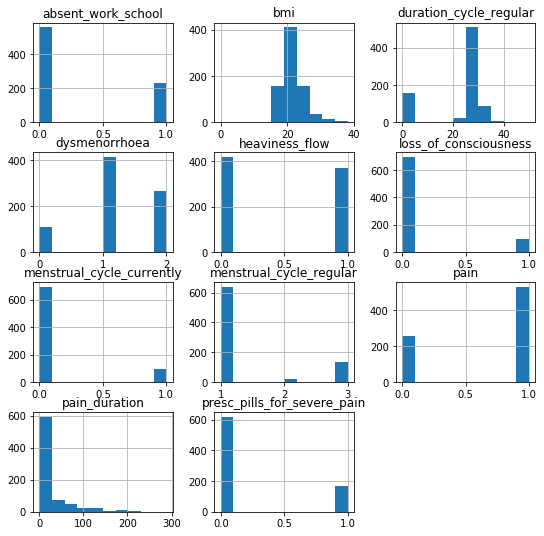

In [109]:
symptoms.groupby('endometriosis').hist(figsize=(9, 9))

In [110]:
endometriosis.isnull().sum()
endometriosis.isna().sum()

symptoms_mod = symptoms[(symptoms.presc_pills_for_severe_pain != 0) & (symptoms.bmi != 0) & (symptoms.heaviness_flow != 0)]
print(symptoms_mod.shape)

(92, 13)


In [111]:
feature_names = ['pain', 'pain_duration', 'pain_localisation', 'dysmenorrhoea', 'presc_pills_for_severe_pain', 'bmi', 'absent_work_school', 'loss_of_consciousness', 'menstrual_cycle_currently', 'menstrual_cycle_regular', 'heaviness_flow']
X = symptoms_mod[feature_names]
y = symptoms_mod.endometriosis

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = symptoms_mod.endometriosis, random_state=0)
from sklearn import preprocessing

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'Undetermined'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'Middle'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit faile

  Name  Score
0  KNN    NaN
1  SVC    NaN
2   LR    NaN
3   DT    NaN
4  GNB    NaN
5   RF    NaN
6   GB    NaN


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


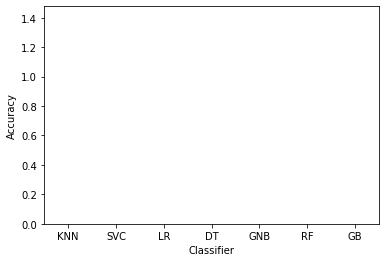

In [119]:
from sklearn import model_selection   
model_selection.KFold

names = []
scores = []
for name, model in models:
    
    kfold = model_selection.KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()